In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [2]:
infile = 's4-merged_auc.dir/merged_auc.txt'

In [3]:
auc_dataframe = pd.read_table(infile)
auc_dataframe.head()

term_name       auc normalization  \
0  AKT1_human_kinase_ARCHS4_coexpression  0.991607   correlation   
1  AKT1_human_kinase_ARCHS4_coexpression  0.913105      fraction   
2  AKT1_human_kinase_ARCHS4_coexpression  0.903404           raw   
3  AKT1_human_kinase_ARCHS4_coexpression  0.913940        zscore   
4  AKT2_human_kinase_ARCHS4_coexpression  0.981730   correlation   

                library  nr_genes  
0  ARCHS4_Kinases_Coexp       299  
1  ARCHS4_Kinases_Coexp       299  
2  ARCHS4_Kinases_Coexp       299  
3  ARCHS4_Kinases_Coexp       299  
4  ARCHS4_Kinases_Coexp       299

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



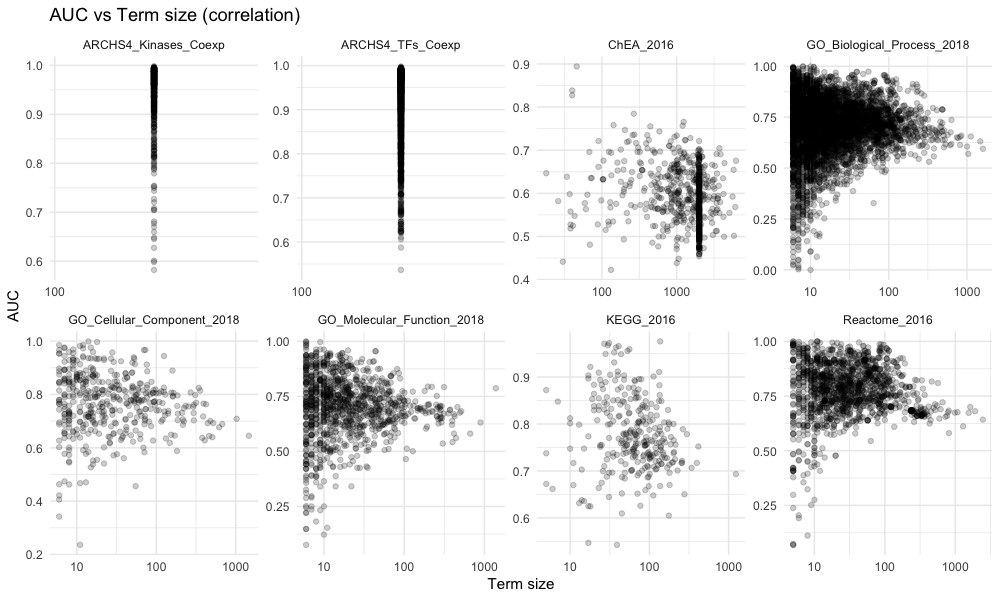

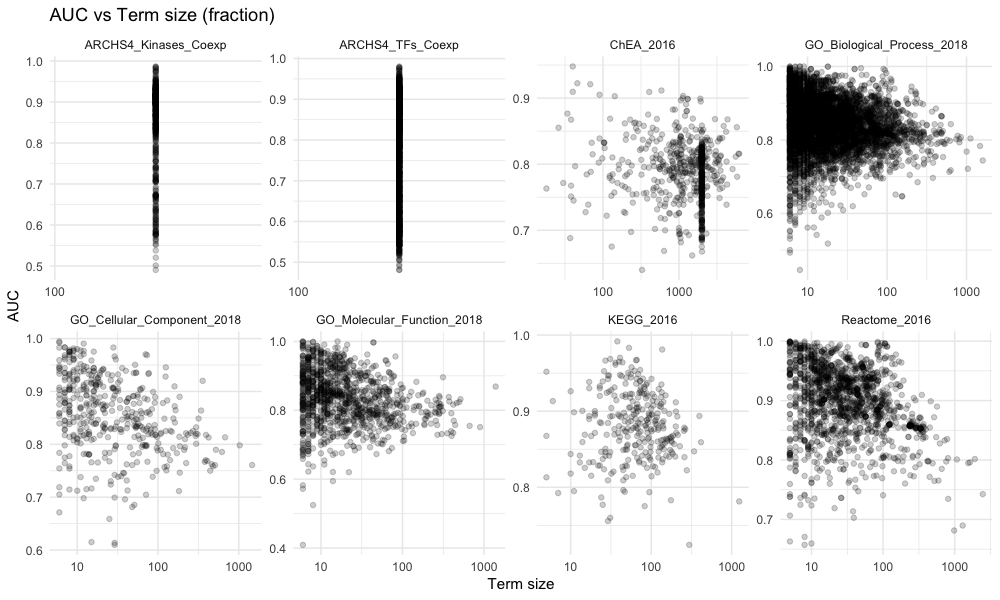

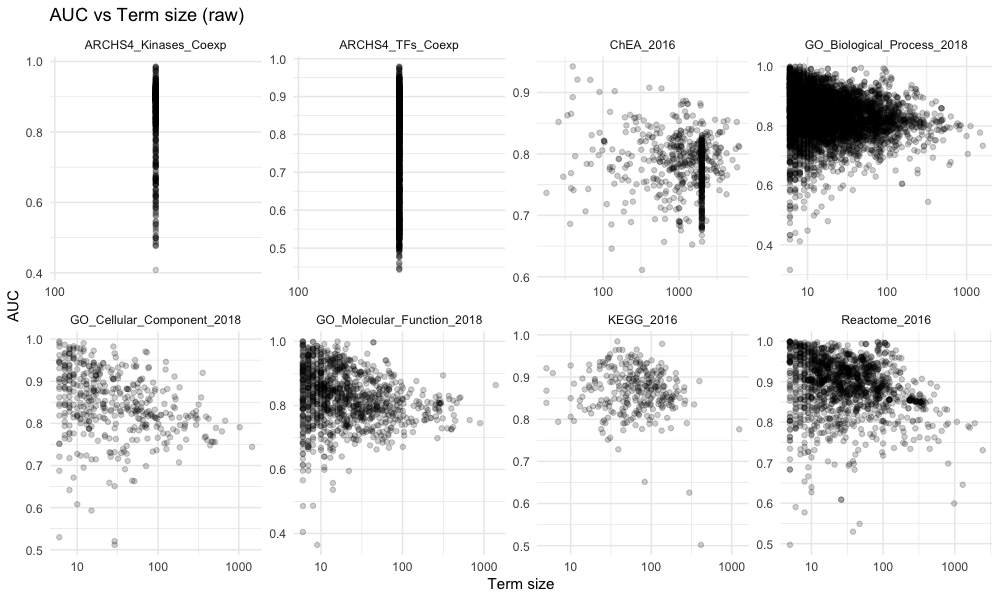

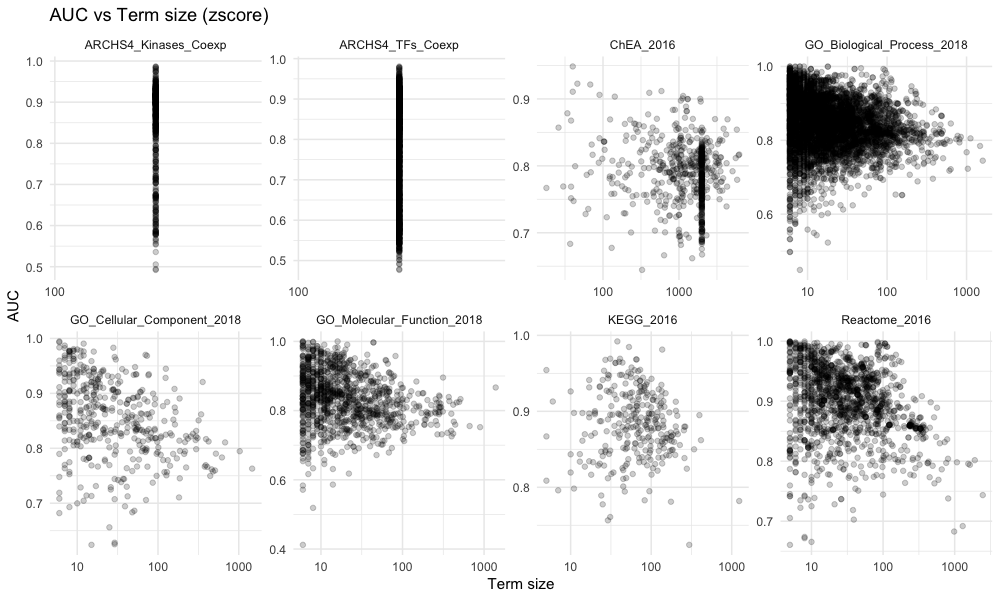

In [54]:
for normalization in auc_dataframe['normalization'].unique():
    plot_dataframe = auc_dataframe[auc_dataframe['normalization'] == normalization]
    title = 'AUC vs Term size ('+normalization+')'
    %R -i plot_dataframe,title -h 600 -w 1000 -r 100 print(ggplot(plot_dataframe, aes(x=nr_genes, y=auc)) + geom_point(alpha=0.2) + facet_wrap(~library, scales='free', nrow=2) + scale_x_log10() + theme_minimal() + xlab('Term size') + ylab('AUC') + ggtitle(title))
    

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



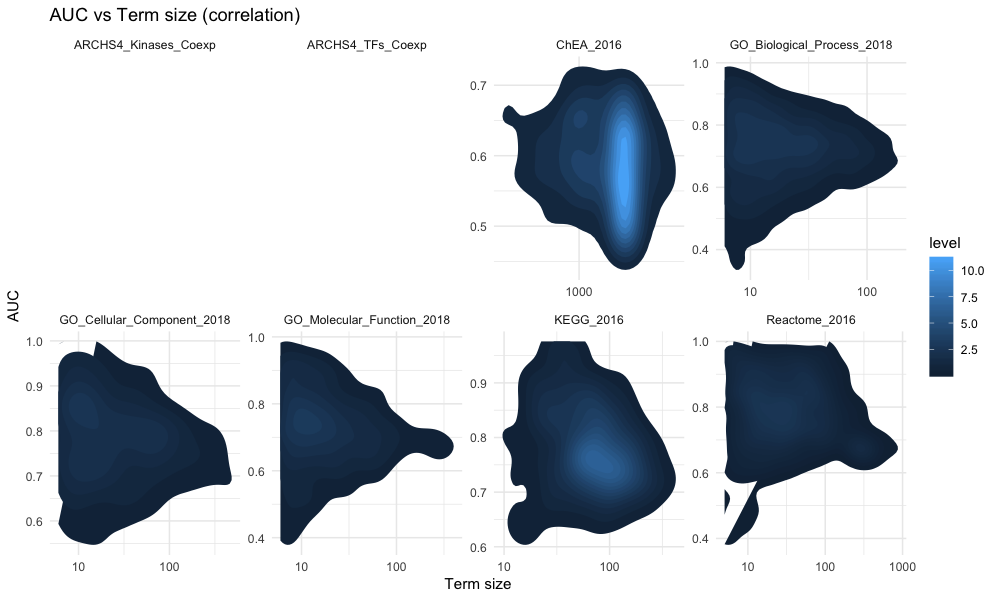

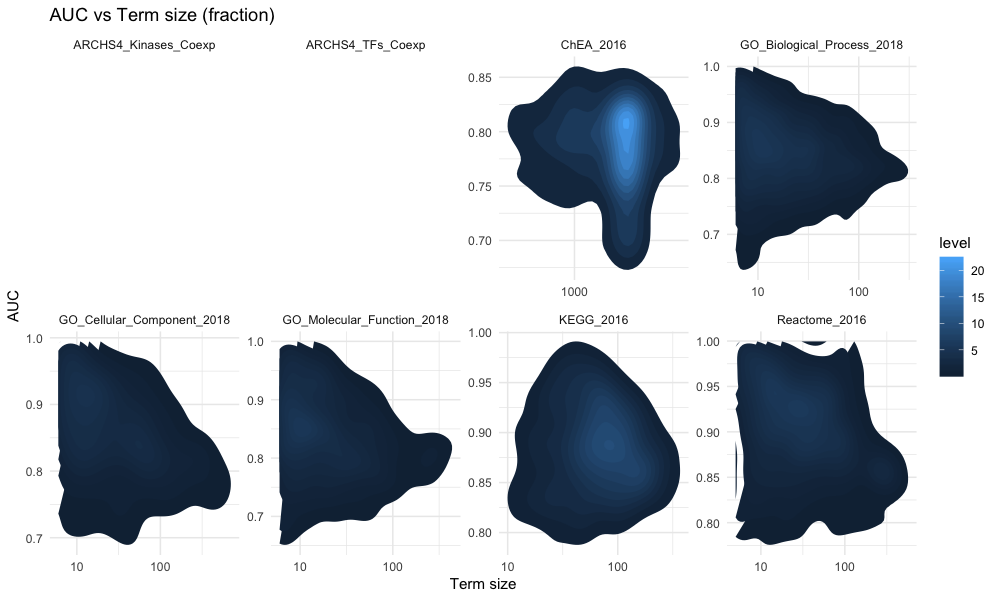

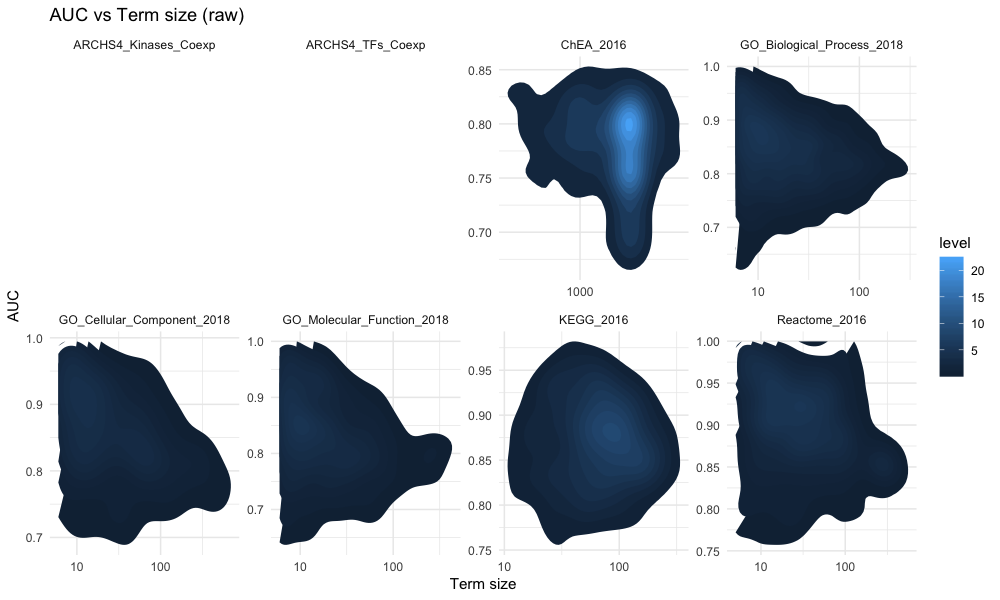

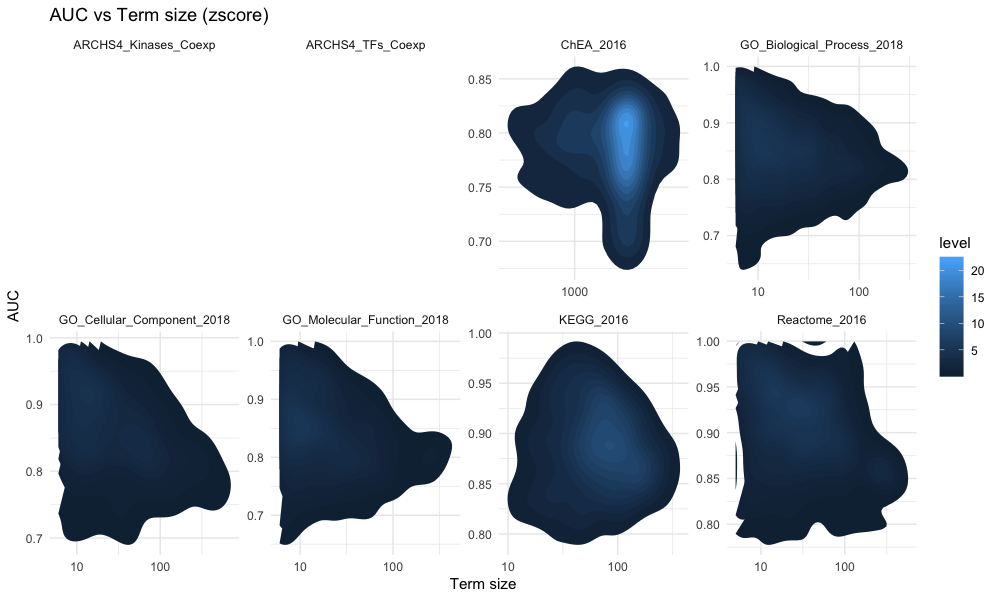

In [38]:
for normalization in auc_dataframe['normalization'].unique():
    plot_dataframe = auc_dataframe[auc_dataframe['normalization'] == normalization]
    title = 'AUC vs Term size ('+normalization+')'
    %R -i plot_dataframe,title -h 600 -w 1000 -r 100 print(ggplot(plot_dataframe, aes(x=nr_genes, y=auc)) + stat_density_2d(aes(fill=..level..), geom="polygon") + facet_wrap(~library, scales='free', nrow=2) + scale_x_log10() + theme_minimal() + xlab('Term size') + ylab('AUC') + ggtitle(title))
    

In [42]:
# Cast dataframe
cast_dataframe = auc_dataframe.pivot_table(index=['term_name', 'library', 'nr_genes'], columns='normalization', values='auc').dropna().reset_index().set_index('term_name')#.merge(merged_auc_dataframe[['term_name', 'library']]).reset
cast_dataframe.head()

normalization                                                          library  \
term_name                                                                        
'de novo' posttranslational protein folding (GO...  GO_Biological_Process_2018   
1-acylglycerol-3-phosphate O-acyltransferase ac...  GO_Molecular_Function_2018   
1-phosphatidylinositol 4-kinase activity (GO:00...  GO_Molecular_Function_2018   
1-phosphatidylinositol binding (GO:0005545)         GO_Molecular_Function_2018   
1-phosphatidylinositol-3-kinase activity (GO:00...  GO_Molecular_Function_2018   

normalization                                       nr_genes  correlation  \
term_name                                                                   
'de novo' posttranslational protein folding (GO...        31     0.827933   
1-acylglycerol-3-phosphate O-acyltransferase ac...        18     0.697563   
1-phosphatidylinositol 4-kinase activity (GO:00...         6     0.906332   
1-phosphatidylinositol binding (GO:0005545)               14     0.788291   
1-phosphatidylinositol-3-kinase activity (GO:00...        44     0.718698   

normalization                                       fraction       raw  \
term_name                                                                
'de novo' posttranslational protein folding (GO...  0.856666  0.861917   
1-acylglycerol-3-phosphate O-acyltransferase ac...  0.836898  0.833246   
1-phosphatidylinositol 4-kinase activity (GO:00...  0.883254  0.878809   
1-phosphatidylinositol binding (GO:0005545)         0.860722  0.855667   
1-phosphatidylinositol-3-kinase activity (GO:00...  0.885006  0.870150   

normalization                                         zscore  
term_name                                                     
'de novo' posttranslational protein folding (GO...  0.856399  
1-acylglycerol-3-phosphate O-acyltransferase ac...  0.836737  
1-phosphatidylinositol 4-kinase activity (GO:00...  0.884485  
1-phosphatidylinositol binding (GO:0005545)         0.860010  
1-phosphatidylinositol-3-kinase activity (GO:00...  0.886908

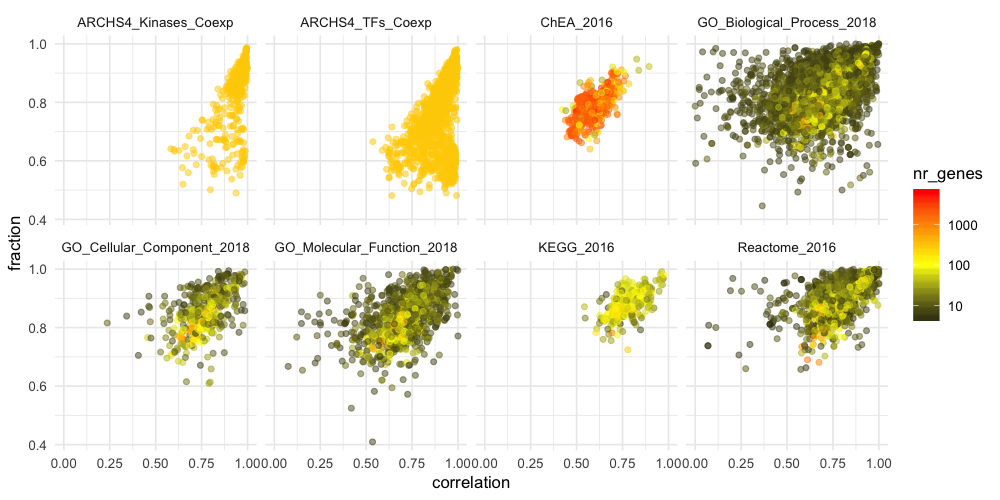

In [53]:
%%R -i cast_dataframe -h 500 -w 1000 -r 110
ggplot(cast_dataframe, aes(x=correlation, y=fraction, color=nr_genes)) + 
    geom_point(alpha=0.5) +
    scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint=2) +
    facet_wrap(~library, nrow=2) + 
    theme_minimal()